In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
hawkes_data_experiment = pd.read_csv("/Users/felipemoret/Desktop/results.csv")

**Shape of the data**

In [3]:
hawkes_data_experiment.shape

(1151, 14)

**Type of the data**

In [4]:
hawkes_data_experiment.head()

,Test Index,Simulation Index,Real Alpha,Real Beta,Real Baseline,Real Endogeneity,Delta,Estimated Alpha,Estimated Beta,Estimated Baseline,Estimated Endogeneity,Duplicates,Estimation Method,Initial Estimation Point
0,1,1,0.1,1,1,0.1,0.000100,0.123382,1.634047,0.994104,0.075507,supression,mle,original_parameters
1,1,1,0.1,1,1,0.1,0.002139,0.123014,1.535922,0.992771,0.080091,supression,mle,original_parameters
2,1,1,0.1,1,1,0.1,0.004178,0.122112,1.538372,0.992914,0.079377,supression,mle,original_parameters
3,1,1,0.1,1,1,0.1,0.006216,0.118407,1.469223,0.994462,0.080591,supression,mle,original_parameters
4,1,1,0.1,1,1,0.1,0.008255,0.115987,1.390032,0.994544,0.083442,supression,mle,original_parameters


**Plotting the mean of estimated values for each test for each delta value**

In [5]:
def return_mean_estimated_parameters_by_each_test_per_delta(hawkes_data_experiment):
    number_of_tests = hawkes_data_experiment["Test Index"].nunique()
    number_of_deltas = hawkes_data_experiment["Simulation Index"].nunique()
    different_deltas = hawkes_data_experiment["Delta"].unique() 

    mean_estimated_parameters_by_test_per_delta = pd.DataFrame(columns = ["Test Index", "Delta", "Mean Estimated Baseline", "Mean Estimated Alpha", "Mean Estimated Beta", "Max Estimated Baseline", "Max Estimated Alpha", "Max Estimated Beta", "Min Estimated Baseline", "Min Estimated Alpha", "Min Estimated Beta","Std Estimated Baseline", "Std Estimated Alpha", "Std Estimated Beta"])
    
    for i in range(1,number_of_tests + 1):
        current_test = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]
        for delta in different_deltas:
            current_test_for_this_delta = current_test[current_test["Delta"] == delta]
            current_estimated_mean_alpha = current_test_for_this_delta["Estimated Alpha"].mean()
            current_estimated_mean_beta = current_test_for_this_delta["Estimated Beta"].mean()
            current_estimated_mean_baseline = current_test_for_this_delta["Estimated Baseline"].mean()
            current_max_estimated_alpha = current_test_for_this_delta["Estimated Alpha"].max()
            current_max_estimated_beta = current_test_for_this_delta["Estimated Beta"].max()
            current_max_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].max()
            current_min_estimated_alpha = current_test_for_this_delta["Estimated Alpha"].min()
            current_min_estimated_beta = current_test_for_this_delta["Estimated Beta"].min()
            current_min_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].min()
            current_std_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].std()
            current_std_estimated_alpha = current_test_for_this_delta["Estimated Alpha"].std()
            current_std_estimated_beta = current_test_for_this_delta["Estimated Beta"].std()
            to_append = [i, delta, current_estimated_mean_baseline, current_estimated_mean_alpha, current_estimated_mean_beta, current_max_estimated_baseline, current_max_estimated_alpha, current_max_estimated_beta, current_min_estimated_baseline, current_min_estimated_alpha, current_min_estimated_beta, current_std_estimated_baseline, current_std_estimated_alpha, current_std_estimated_beta]
            to_append_series = pd.Series(to_append, index = mean_estimated_parameters_by_test_per_delta.columns)
            mean_estimated_parameters_by_test_per_delta = mean_estimated_parameters_by_test_per_delta.append(to_append_series, ignore_index = True)
            
    return mean_estimated_parameters_by_test_per_delta 
       

In [6]:
mean_estimated_parameters_by_test_per_delta  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_data_experiment)

In [7]:
mean_estimated_parameters_by_test_per_delta.head()

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Alpha,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Alpha,Max Estimated Beta,Min Estimated Baseline,Min Estimated Alpha,Min Estimated Beta,Std Estimated Baseline,Std Estimated Alpha,Std Estimated Beta
0,1.0,0.000100,0.990005,0.140263,2.692744,1.158071,0.779142,33.665684,0.802533,0.013862,0.000120,0.085522,0.152107,6.686330
1,1.0,0.002139,0.988064,0.146983,2.621128,1.160608,0.882407,34.921832,0.802516,0.013874,0.000100,0.085166,0.174210,7.110297
2,1.0,0.004178,0.987688,0.141006,2.436348,1.161137,0.769696,31.382433,0.803311,0.012666,0.000121,0.085376,0.153033,6.381735
3,1.0,0.006216,0.982068,0.148734,2.247489,1.159012,0.860212,30.247559,0.804487,0.009643,0.000101,0.091177,0.170655,6.161876
4,1.0,0.008255,0.985439,0.109182,2.164264,1.162752,0.278242,26.595858,0.806299,0.009677,0.021045,0.086033,0.068957,5.393857


**Plotting mean of estimated $\alpha$ for each test vs $\delta$**

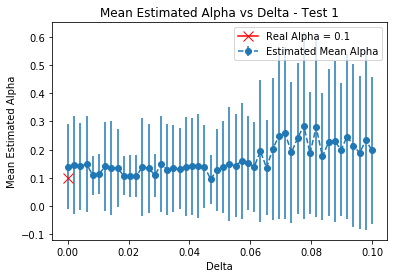

In [9]:
number_of_tests = hawkes_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test = mean_estimated_parameters_by_test_per_delta[mean_estimated_parameters_by_test_per_delta["Test Index"] == i]
    #plt.plot(mean_estimated_parameters_current_test["Delta"], mean_estimated_parameters_current_test["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha")
    plt.errorbar(mean_estimated_parameters_current_test["Delta"], mean_estimated_parameters_current_test["Mean Estimated Alpha"] , yerr = mean_estimated_parameters_current_test["Std Estimated Alpha"] , fmt='--o', label = "Estimated Mean Alpha")
    plt.plot([0], [real_alpha], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Alpha = {real_alpha}", color = 'r')
    plt.title(f"Mean Estimated Alpha vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Alpha")
    plt.legend()
    plt.show()


**Plotting mean of estimated $\beta$ for each test vs $\delta$**

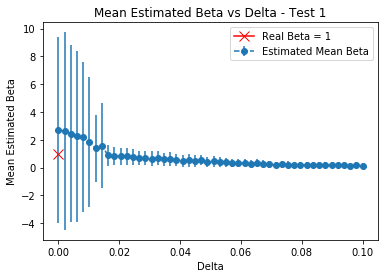

In [10]:
number_of_tests = hawkes_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_beta = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    mean_estimated_parameters_current_test = mean_estimated_parameters_by_test_per_delta[mean_estimated_parameters_by_test_per_delta["Test Index"] == i]
    plt.errorbar(mean_estimated_parameters_current_test["Delta"], mean_estimated_parameters_current_test["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean Beta")
    plt.plot([0], [real_beta], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Beta = {real_beta}", color = 'r')
    plt.title(f"Mean Estimated Beta vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Beta")
    plt.legend()
    plt.show()

**Plotting mean of estimated $\lambda_{0}$ for each test vs $\delta$**

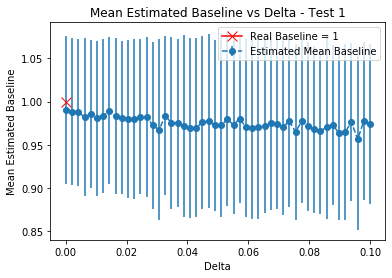

In [11]:
number_of_tests = hawkes_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_baseline = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test = mean_estimated_parameters_by_test_per_delta[mean_estimated_parameters_by_test_per_delta["Test Index"] == i]
    plt.errorbar(mean_estimated_parameters_current_test["Delta"], mean_estimated_parameters_current_test["Mean Estimated Baseline"] , yerr = mean_estimated_parameters_current_test["Std Estimated Baseline"] , fmt='--o', label = "Estimated Mean Baseline")
    plt.plot([0], [real_baseline], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Baseline = {real_baseline}", color = 'r')
    plt.title(f"Mean Estimated Baseline vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Baseline")
    plt.legend()
    plt.show()